In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
# Load data
import os
main_dir = os.getcwd().rsplit("\\", 2)[0]


In [ ]:
df = pd.read_csv(f"{main_dir}/data/processed/cleaned_data_final.csv")

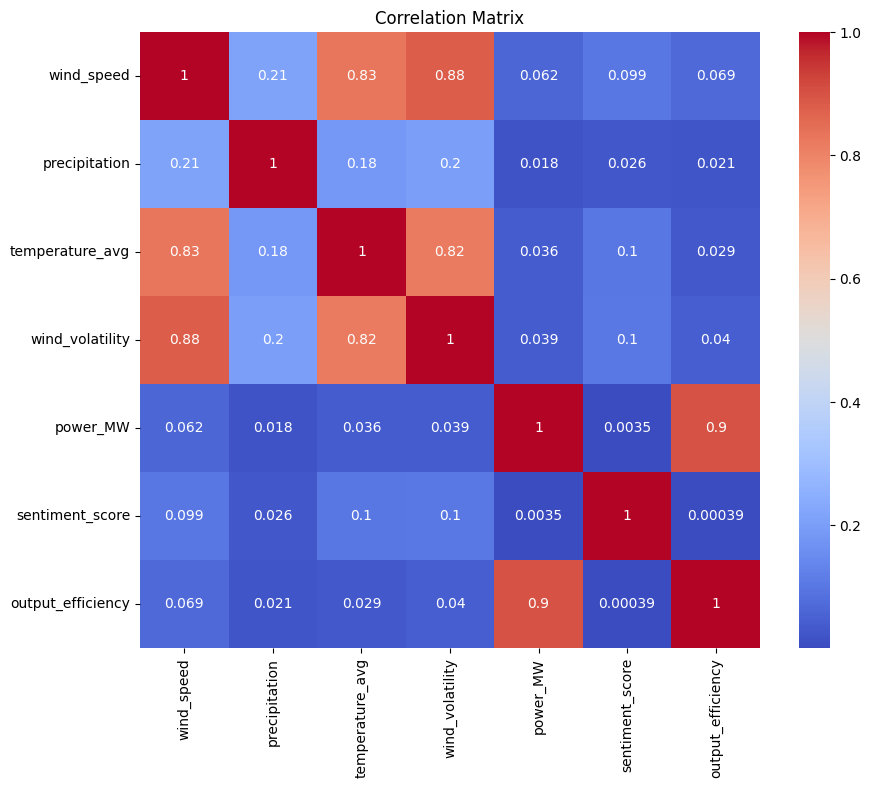

In [4]:
df['date'] = pd.to_datetime(df['date'], format='mixed')
# Correlation matrix by energy_source
plt.figure(figsize=(10, 8))
corr = df[['wind_speed', 'precipitation', 'temperature_avg', 'wind_volatility', 'power_MW', 'sentiment_score', 'output_efficiency']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig(f"{main_dir}/notebooks/correlation_matrix.png")
plt.show()
plt.close()

C:\Users\stuar\AppData\Local\Temp\ipykernel_15968\2028317495.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f"{main_dir}/notebooks/power_time_series.png")
c:\Users\stuar\Desktop\Renewable Energy Maintenance\renv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


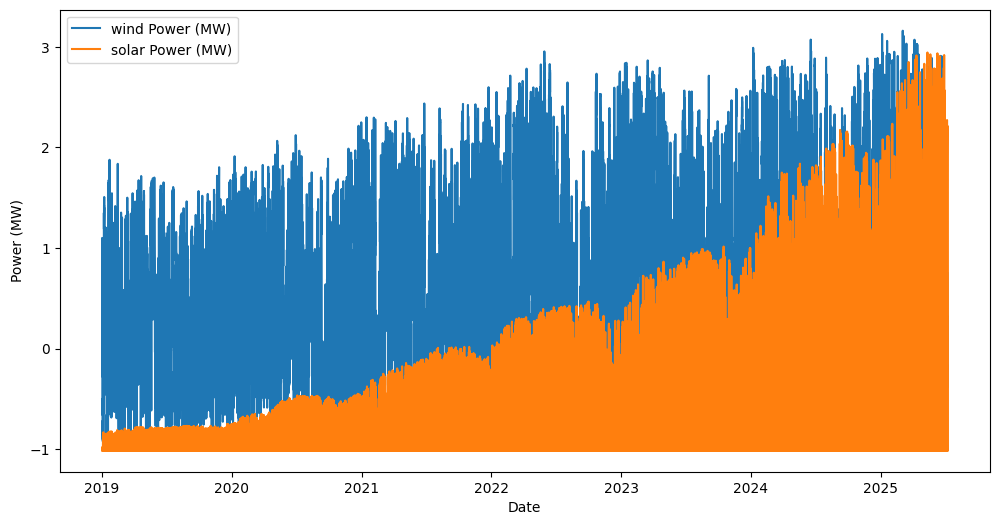

In [5]:
# Time series plot
plt.figure(figsize=(12, 6))
for source in ['wind', 'solar']:
    subset = df[df['energy_source'] == source]
    plt.plot(subset['date'], subset['power_MW'], label=f"{source} Power (MW)")
plt.xlabel("Date")
plt.ylabel("Power (MW)")
plt.legend()
plt.savefig(f"{main_dir}/notebooks/power_time_series.png")
plt.show()
plt.close()


In [7]:
df.columns

Index(['date', 'energy_source', 'power_MW', 'maintenance_status', 'respondent',
       'latitude', 'longitude', 'capacity_MW', 'year', 'plantcode',
       'plantname', 'nearest_station', 'wind_speed', 'precipitation',
       'temperature_avg', 'wind_volatility', 'sentiment_score', 'site_density',
       'output_efficiency'],
      dtype='object')

In [8]:
# Geospatial map
m = folium.Map(location=[31.9686, -99.9018], zoom_start=6)  # Texas center
marker_cluster = MarkerCluster().add_to(m)
for idx, row in df.drop_duplicates(['latitude', 'longitude', 'energy_source']).iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=f"{row['energy_source']} - {row['plantname']} - Eff: {row['output_efficiency']:.2f}",
        icon=folium.Icon(color='blue' if row['energy_source'] == 'wind' else 'orange')
    ).add_to(marker_cluster)
m.save(f"{main_dir}/notebooks/plant_map.html")
# Summary statistics
print(df.groupby('energy_source').describe())

                   date                                                      \
                  count                           mean                  min   
energy_source                                                                 
solar          31602101  2022-01-23 17:56:16.637129216  2019-01-01 00:00:00   
wind           31602101  2022-01-23 17:56:16.637129216  2019-01-01 00:00:00   

                                                                              \
                               25%                  50%                  75%   
energy_source                                                                  
solar          2020-09-05 10:00:00  2022-02-19 05:00:00  2023-06-11 13:00:00   
wind           2020-09-05 10:00:00  2022-02-19 05:00:00  2023-06-11 13:00:00   

                                           power_MW            ...  \
                               max  std       count      mean  ...   
energy_source                                                  